# Проект Страховая компания "Хоть потоп" 

нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## 1. Загрузка данных

In [79]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
from scipy import stats as st

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# gridsearch
from sklearn.model_selection import GridSearchCV

#preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer

In [80]:
try: 
    data = pd.read_csv('G:\Projects\praktikum\datasets\insurance.csv')
except:
    data = pd.read_csv('/datasets/insurance.csv')

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


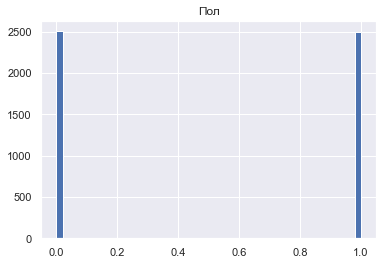

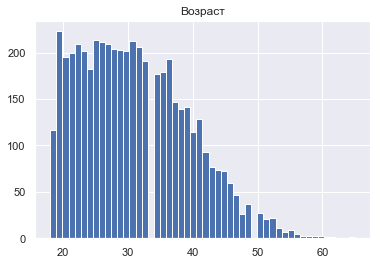

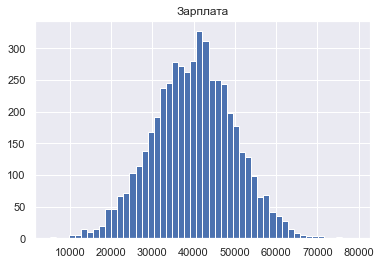

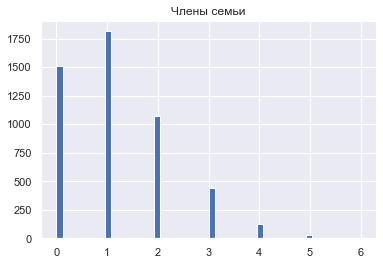

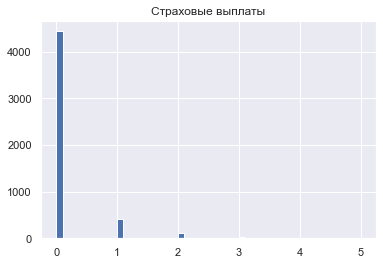

In [82]:
for each in data.columns:
    data.hist(each, bins=50)
    plt.show()

## 2. Ответьте на вопрос и обоснуйте решение.
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

In [83]:
data_train, data_valid = train_test_split(data, train_size = 0.75)
data_train.shape

(3750, 5)

In [84]:
features_train = data_train.drop('Страховые выплаты', axis=1)
target_train = data_train['Страховые выплаты'] 

features_valid = data_valid.drop('Страховые выплаты', axis=1)
target_valid = data_valid['Страховые выплаты'] 

In [85]:
num_cols = ['Возраст', 'Зарплата', 'Члены семьи']
scaler = StandardScaler()
scaler.fit(features_train[num_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [86]:
features_train[num_cols] = scaler.transform(features_train[num_cols])
features_valid[num_cols] = scaler.transform(features_valid[num_cols])

In [87]:
features_valid.head(10)

,Пол,Возраст,Зарплата,Члены семьи
4610,1,-1.294716,0.999283,0.735335
4221,1,0.975235,1.271871,-1.087809
1294,1,0.377879,-0.192029,-0.176237
1822,0,1.214177,1.564651,-1.087809
4779,0,0.258408,-1.262190,-0.176237
464,1,1.453119,-0.545384,-1.087809
2246,1,-1.175245,-0.696822,-0.176237
1709,1,-0.219476,1.635322,0.735335
1263,0,1.572590,0.837749,-1.087809
3156,0,-0.219476,-1.554970,-1.087809


In [88]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
model.score(features_valid, target_valid)

0.4331948568497744